In [31]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [32]:
# loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv('data/creditcard_2023.csv')

In [33]:
# first 5 rows of the dataset
credit_card_data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [34]:
credit_card_data.tail()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1
568629,568629,-0.795144,0.433236,-0.649140,0.374732,-0.244976,-0.603493,-0.347613,-0.340814,0.253971,...,0.534853,-0.291514,0.157303,0.931030,-0.349423,-1.090974,-1.575113,0.722936,21493.92,1


In [35]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [36]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [37]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

0    284315
1    284315
Name: Class, dtype: int64

In [38]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [39]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(284315, 31)


In [40]:
# statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean      12026.313506
std        6929.500715
min          50.120000
25%        6034.540000
50%       11996.900000
75%       18040.265000
max       24039.930000
Name: Amount, dtype: float64

In [41]:
fraud.Amount.describe()

count    284315.000000
mean      12057.601763
std        6909.750891
min          50.010000
25%        6074.640000
50%       12062.450000
75%       18033.780000
max       24039.930000
Name: Amount, dtype: float64

In [42]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,142442.987714,0.505761,-0.491878,0.682095,-0.735981,0.338639,0.435088,0.491234,-0.144294,0.585522,...,-0.179851,-0.10964,-0.014098,-0.010255,0.130107,-0.061847,-0.071052,-0.214002,-0.102024,12026.313506
1,426186.012286,-0.505761,0.491878,-0.682095,0.735981,-0.338639,-0.435088,-0.491234,0.144294,-0.585522,...,0.179851,0.10964,0.014098,0.010255,-0.130107,0.061847,0.071052,0.214002,0.102024,12057.601763


In [43]:
legit_sample = legit.sample(n=492)

In [44]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [45]:
new_dataset.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
141692,141692,0.989714,-0.347040,0.614453,-0.349436,0.187365,0.122220,0.444400,-0.170108,0.493918,...,-0.206056,-0.661103,0.128897,0.113019,0.156444,0.289287,-0.245654,-0.029386,9312.67,0
78566,78566,0.964833,-0.352444,0.733137,-0.145973,0.181166,0.264332,0.442599,-0.161899,0.496610,...,-0.105339,-0.008257,-0.030706,0.178920,0.708925,-0.906867,-0.194003,-0.041837,17568.20,0
94012,94012,0.786438,-0.600500,1.232521,-0.254211,-0.104811,0.442207,0.269843,-0.129499,0.954577,...,-0.019206,0.546521,-0.104845,1.043946,0.278112,0.995873,-0.219790,0.004989,1816.44,0
14443,14443,0.825362,-0.492425,0.382614,-0.456402,0.294887,0.339017,0.580141,-0.164514,0.239954,...,-0.206297,-0.932256,-0.005485,-0.530032,0.221092,0.366886,-0.320387,-0.067944,5916.49,0
56888,56888,-0.038204,-0.383188,1.951508,-0.367711,-0.166137,0.984588,0.175515,0.104044,1.173484,...,-0.094564,0.227671,0.118823,0.515404,-0.950603,0.635352,-0.272888,-0.168626,8405.37,0


In [46]:
new_dataset.tail()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1
568629,568629,-0.795144,0.433236,-0.649140,0.374732,-0.244976,-0.603493,-0.347613,-0.340814,0.253971,...,0.534853,-0.291514,0.157303,0.931030,-0.349423,-1.090974,-1.575113,0.722936,21493.92,1


In [47]:
new_dataset['Class'].value_counts()

1    284315
0       492
Name: Class, dtype: int64

In [48]:
new_dataset.groupby('Class').mean()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,143337.323171,0.581283,-0.514847,0.660355,-0.739802,0.305134,0.443828,0.466748,-0.157466,0.616897,...,-0.178550,-0.10622,-0.119357,-0.003270,0.120315,-0.050538,-0.034010,-0.225390,-0.106679,12300.651890
1,426186.012286,-0.505761,0.491878,-0.682095,0.735981,-0.338639,-0.435088,-0.491234,0.144294,-0.585522,...,0.179851,0.10964,0.014098,0.010255,-0.130107,0.061847,0.071052,0.214002,0.102024,12057.601763


In [49]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [50]:
print(X)

            id        V1        V2        V3        V4        V5        V6  \
141692  141692  0.989714 -0.347040  0.614453 -0.349436  0.187365  0.122220   
78566    78566  0.964833 -0.352444  0.733137 -0.145973  0.181166  0.264332   
94012    94012  0.786438 -0.600500  1.232521 -0.254211 -0.104811  0.442207   
14443    14443  0.825362 -0.492425  0.382614 -0.456402  0.294887  0.339017   
56888    56888 -0.038204 -0.383188  1.951508 -0.367711 -0.166137  0.984588   
...        ...       ...       ...       ...       ...       ...       ...   
568625  568625 -0.833437  0.061886 -0.899794  0.904227 -1.002401  0.481454   
568626  568626 -0.670459 -0.202896 -0.068129 -0.267328 -0.133660  0.237148   
568627  568627 -0.311997 -0.004095  0.137526 -0.035893 -0.042291  0.121098   
568628  568628  0.636871 -0.516970 -0.300889 -0.144480  0.131042 -0.294148   
568629  568629 -0.795144  0.433236 -0.649140  0.374732 -0.244976 -0.603493   

              V7        V8        V9  ...       V20       V21  

In [51]:
print(Y)

141692    0
78566     0
94012     0
14443     0
56888     0
         ..
568625    1
568626    1
568627    1
568628    1
568629    1
Name: Class, Length: 284807, dtype: int64


In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [53]:
print(X.shape, X_train.shape, X_test.shape)

(284807, 30) (227845, 30) (56962, 30)


In [54]:
model = LogisticRegression()
model.fit(X_train, Y_train)
X_train_prediction = model.predict(X_train)
lr_training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
X_test_prediction = model.predict(X_test)
lr_test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('LogisticRegression - Accuracy on Training data : ', lr_training_data_accuracy)
print('LogisticRegression - Accuracy score on Test Data : ', lr_test_data_accuracy)

LogisticRegression - Accuracy on Training data :  0.9980908073471
LogisticRegression - Accuracy score on Test Data :  0.998121554720691


In [55]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=2)
rf_model.fit(X_train, Y_train)
rf_train_predictions = rf_model.predict(X_train)
rf_training_accuracy = accuracy_score(rf_train_predictions, Y_train)
rf_test_predictions = rf_model.predict(X_test)
rf_test_accuracy = accuracy_score(rf_test_predictions, Y_test)

print('Random Forest - Accuracy on Training Data:', rf_training_accuracy)
print('Random Forest - Accuracy on Test Data:', rf_test_accuracy)


Random Forest - Accuracy on Training Data: 1.0
Random Forest - Accuracy on Test Data: 0.9997893332397036


In [56]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=2)
dt_model.fit(X_train, Y_train)
dt_train_predictions = dt_model.predict(X_train)
dt_training_accuracy = accuracy_score(dt_train_predictions, Y_train)
dt_test_predictions = dt_model.predict(X_test)
dt_test_accuracy = accuracy_score(dt_test_predictions, Y_test)

print('Decision Tree - Accuracy on Training Data:', dt_training_accuracy)
print('Decision Tree - Accuracy on Test Data:', dt_test_accuracy)


Decision Tree - Accuracy on Training Data: 1.0
Decision Tree - Accuracy on Test Data: 0.9995962220427653


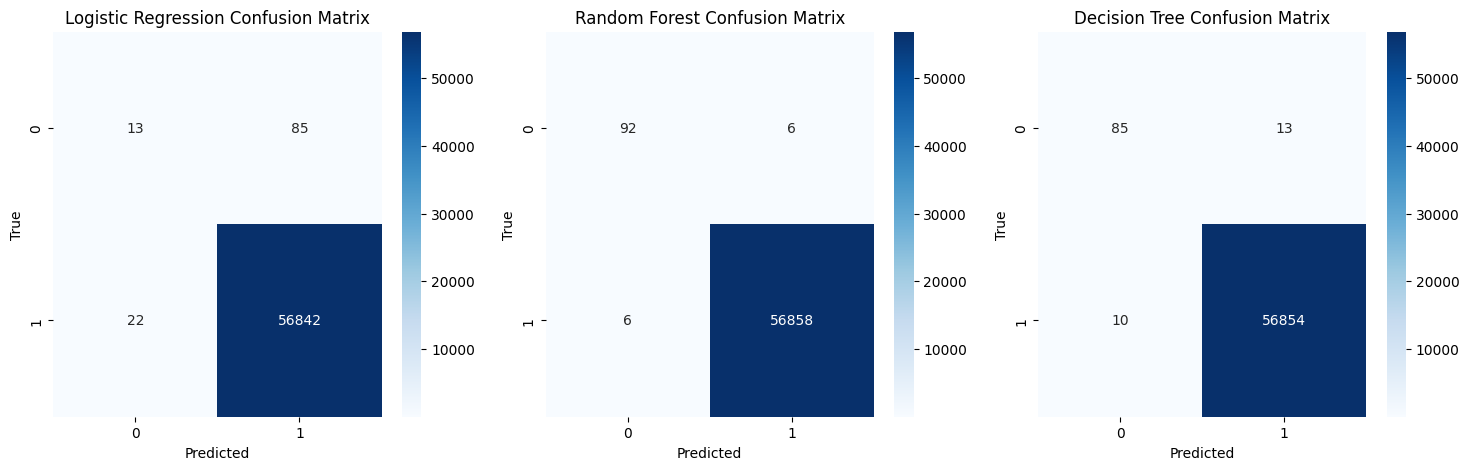

In [57]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

lr_confusion_matrix = confusion_matrix(Y_test, X_test_prediction)

rf_confusion_matrix = confusion_matrix(Y_test, rf_test_predictions)

dt_confusion_matrix = confusion_matrix(Y_test, dt_test_predictions)

plt.figure(figsize=(18, 5))

plt.subplot(131)
sns.heatmap(lr_confusion_matrix, annot=True, cmap="Blues", fmt="d")
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.subplot(132)
sns.heatmap(rf_confusion_matrix, annot=True, cmap="Blues", fmt="d")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.subplot(133)
sns.heatmap(dt_confusion_matrix, annot=True, cmap="Blues", fmt="d")
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.show()


In [58]:

# Train the Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, Y_train)
lr_predictions = lr_model.predict(X_test)
lr_accuracy = accuracy_score(Y_test, lr_predictions)

# Train the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, Y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(Y_test, rf_predictions)

# Train the Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, Y_train)
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(Y_test, dt_predictions)

# Compare the accuracy of the three models
print("Logistic Regression Accuracy: {:.2f}%".format(lr_accuracy * 100))
print("Random Forest Accuracy: {:.2f}%".format(rf_accuracy * 100))
print("Decision Tree Accuracy: {:.2f}%".format(dt_accuracy * 100))


Logistic Regression Accuracy: 99.81%
Random Forest Accuracy: 99.98%
Decision Tree Accuracy: 99.96%


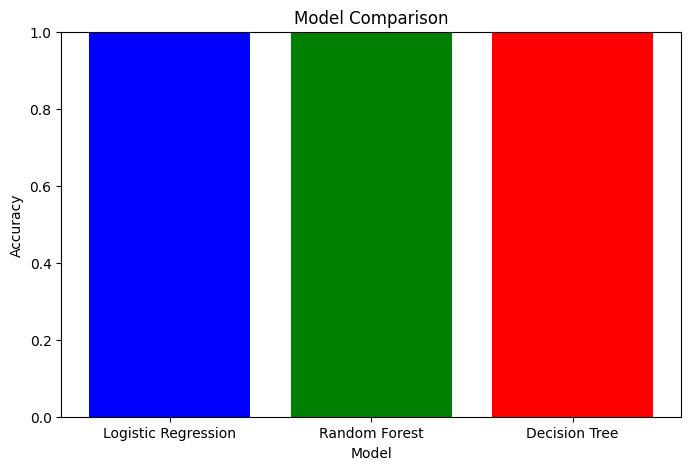

In [59]:
models = ['Logistic Regression', 'Random Forest', 'Decision Tree']
accuracies = [lr_accuracy, rf_accuracy, dt_accuracy]

plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.title('Model Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.0, 1.0)
plt.show()

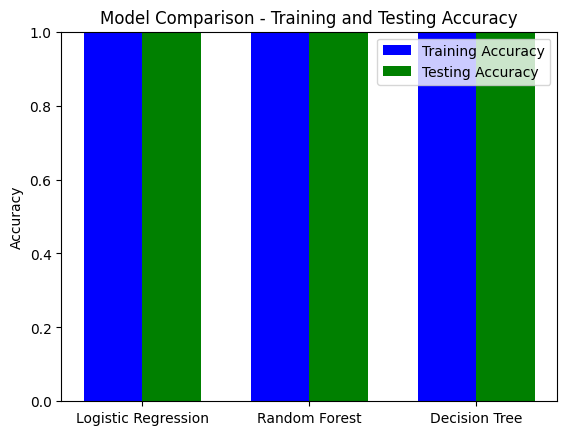

In [60]:
# Create a grouped bar chart to visualize the training and testing accuracies
models = ['Logistic Regression', 'Random Forest', 'Decision Tree']
train_accuracies = [lr_training_data_accuracy, rf_training_accuracy,dt_training_accuracy]
test_accuracies = [lr_test_data_accuracy, rf_test_accuracy, dt_test_accuracy]

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, train_accuracies, width, label='Training Accuracy', color='b')
rects2 = ax.bar(x + width/2, test_accuracies, width, label='Testing Accuracy', color='g')

ax.set_ylabel('Accuracy')
ax.set_title('Model Comparison - Training and Testing Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.ylim(0.0, 1.0)
plt.show()